## Web Scraping to Collectd Conference Papers

In [1]:
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd

# Base URL for the NeurIPS papers
BASE_URL = "https://papers.nips.cc/paper_files/paper/{year}"

def get_paper_links(year):
    """Fetch all paper links from the NeurIPS proceedings page for a given year."""
    url = BASE_URL.format(year=year)
    response = requests.get(url)
    if response.status_code != 200:
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    paper_list = soup.find_all('li', class_='none')

    paper_links = []
    for paper in paper_list:
        title = paper.find('a').text
        link = paper.find('a')['href']
        paper_links.append((title, link))

    return paper_links

def get_paper_details(link):
    """Extract the title and abstract from the paper's individual page."""
    base_url = "https://papers.nips.cc"
    paper_url = base_url + link
    response = requests.get(paper_url)
    if response.status_code != 200:
        return None, None

    soup = BeautifulSoup(response.text, 'html.parser')
    title = soup.find('h4').text.strip()
    abstract_section = soup.find('h4', text='Abstract')

    # Extract the abstract, if it exists
    if abstract_section:
        abstract = abstract_section.find_next('p').text.strip()
    else:
        abstract = "No abstract found."

    return title, abstract

def scrape_paper_year(year):
    """Scrape all papers for a specific year."""
    paper_links = get_paper_links(year)
    papers = []

    if not paper_links:
        print(f"No papers found for year {year}")
        return papers

    # Process papers in parallel
    with ThreadPoolExecutor() as executor:
        future_to_paper = {executor.submit(get_paper_details, link): (title, link) for title, link in paper_links}
        for future in as_completed(future_to_paper):
            title, link = future_to_paper[future]
            try:
                paper_title, paper_abstract = future.result()
                if paper_title:
                    papers.append({
                        "year": year,
                        "title": paper_title,
                        "abstract": paper_abstract
                    })
            except Exception as e:
                print(f"Error processing {title}: {e}")

    return papers

def scrape_neurips_papers_parallel(start_year, end_year):
    """Scrape NeurIPS papers from start_year to end_year, extracting titles and abstracts in parallel."""
    all_papers = []

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(scrape_paper_year, year) for year in range(start_year, end_year + 1)]
        for future in as_completed(futures):
            try:
                year_papers = future.result()
                all_papers.extend(year_papers)
            except Exception as e:
                print(f"Error fetching papers for a year: {e}")

    return all_papers

# Scrape papers from 1987 to 2023
papers = scrape_neurips_papers_parallel(1987, 2023)

# Save results to a CSV file
df = pd.DataFrame(papers)
df.to_csv("neurips_papers_1987_2023_parallel.csv", index=False)

print("Scraping complete! Data saved to neurips_papers_1987_2023_parallel.csv")


<ipython-input-1-bfb060c6b57e>:37: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  abstract_section = soup.find('h4', text='Abstract')


No papers found for year 2022
No papers found for year 2023
Scraping complete! Data saved to neurips_papers_1987_2023_parallel.csv


In [2]:
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd

# Base URL for NeurIPS papers
BASE_URL = "https://papers.nips.cc/paper_files/paper/{year}"

def get_paper_links_2022_2023(year):
    """Fetch all paper links from the NeurIPS proceedings page for 2022 and 2023."""
    url = BASE_URL.format(year=year)
    response = requests.get(url)
    if response.status_code != 200:
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    paper_list = soup.find_all('li', class_=['conference', 'datasets_and_benchmarks'])

    paper_links = []
    for paper in paper_list:
        title = paper.find('a').text
        link = paper.find('a')['href']
        paper_links.append((title, link))

    return paper_links

def get_paper_details_2022_2023(link):
    """Extract the title and abstract from the paper's individual page for 2022 and 2023."""
    base_url = "https://papers.nips.cc"
    paper_url = base_url + link
    response = requests.get(paper_url)
    if response.status_code != 200:
        return None, None

    soup = BeautifulSoup(response.text, 'html.parser')
    title = soup.find('h4').text.strip()
    abstract_section = soup.find('h4', string='Abstract')

    # Extract the abstract, if it exists
    if abstract_section:
        abstract = abstract_section.find_next('p').text.strip()
    else:
        abstract = "No abstract found."

    return title, abstract

def scrape_paper_year_2022_2023(year):
    """Scrape all papers for 2022 and 2023."""
    paper_links = get_paper_links_2022_2023(year)
    papers = []

    if not paper_links:
        print(f"No papers found for year {year}")
        return papers

    # Process papers in parallel
    with ThreadPoolExecutor() as executor:
        future_to_paper = {executor.submit(get_paper_details_2022_2023, link): (title, link) for title, link in paper_links}
        for future in as_completed(future_to_paper):
            title, link = future_to_paper[future]
            try:
                paper_title, paper_abstract = future.result()
                if paper_title:
                    papers.append({
                        "year": year,
                        "title": paper_title,
                        "abstract": paper_abstract
                    })
            except Exception as e:
                print(f"Error processing {title}: {e}")

    return papers

def scrape_neurips_papers_2022_2023():
    """Scrape NeurIPS papers for 2022 and 2023."""
    all_papers = []

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(scrape_paper_year_2022_2023, year) for year in [2022, 2023]]
        for future in as_completed(futures):
            try:
                year_papers = future.result()
                all_papers.extend(year_papers)
            except Exception as e:
                print(f"Error fetching papers for a year: {e}")

    return all_papers

# Scrape papers for 2022 and 2023
papers_2022_2023 = scrape_neurips_papers_2022_2023()

# Load the existing CSV and concatenate the new data
existing_df = pd.read_csv("neurips_papers_1987_2023_parallel.csv")
new_df = pd.DataFrame(papers_2022_2023)

# Concatenate the new data to the existing dataframe
combined_df = pd.concat([existing_df, new_df], ignore_index=True)

# Save the updated dataframe to a CSV file
combined_df.to_csv("neurips_papers_1987_2023_parallel_updated.csv", index=False)

print("Scraping complete! Data saved to neurips_papers_1987_2023_parallel_updated.csv")


Scraping complete! Data saved to neurips_papers_1987_2023_parallel_updated.csv


## Exploratory Data Analysis

In [3]:
import matplotlib.pyplot as plt

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
# Explore Possible inappropriate papers by length
short_texts = df[(df['title_length'] < 2) | (df['abstract_length'] < 5)]

# Print the results in a nicely formatted markdown table
print("\n**Titles and Abstracts with Less Than 5 Words:**\n")
print(short_texts[['title', 'abstract']].to_markdown(index=False))



**Titles and Abstracts with Less Than 5 Words:**

| title                                                                                                                                | abstract                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    


**Total Number of Papers:** 20216

**Papers Per Year:**

|   year |   count |
|-------:|--------:|
|   1987 |      77 |
|   1988 |      82 |
|   1989 |      98 |
|   1990 |     140 |
|   1991 |     142 |
|   1992 |     126 |
|   1993 |     146 |
|   1994 |     138 |
|   1995 |     146 |
|   1996 |     152 |
|   1997 |     150 |
|   1998 |     150 |
|   1999 |     150 |
|   2000 |     151 |
|   2001 |     195 |
|   2002 |     204 |
|   2003 |     195 |
|   2004 |     207 |
|   2005 |     207 |
|   2006 |     201 |
|   2007 |     217 |
|   2008 |     250 |
|   2009 |     262 |
|   2010 |     292 |
|   2011 |     306 |
|   2012 |     367 |
|   2013 |     360 |
|   2014 |     411 |
|   2015 |     403 |
|   2016 |     569 |
|   2017 |     679 |
|   2018 |    1009 |
|   2019 |    1428 |
|   2020 |    1898 |
|   2021 |    2334 |
|   2022 |    2834 |
|   2023 |    3540 |

**Abstract Length Statistics per Year (in words, after filtering):**

|   year |    mean |   median |   min |   max |
|---

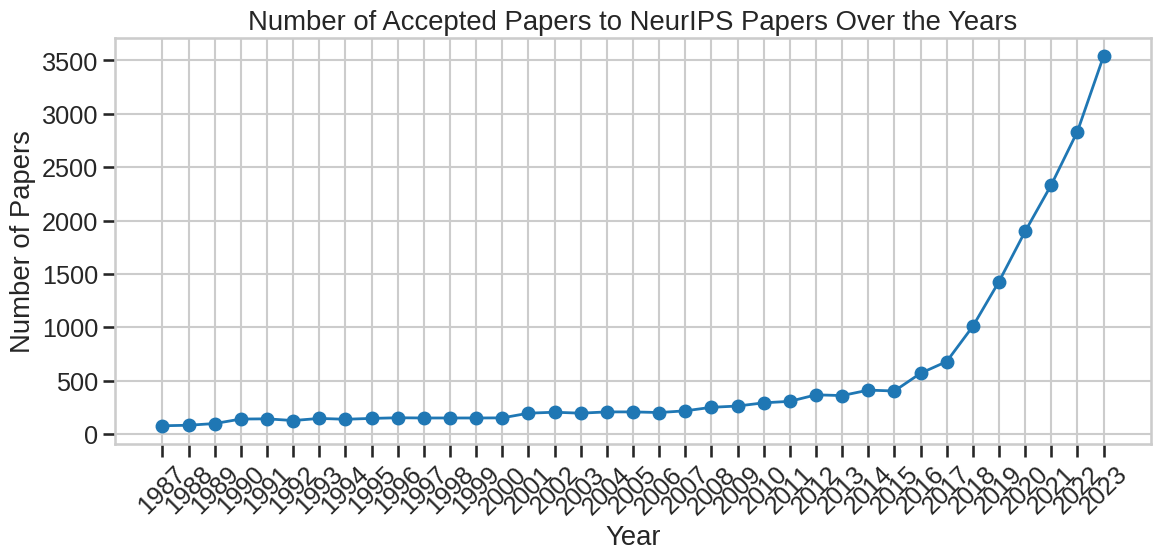

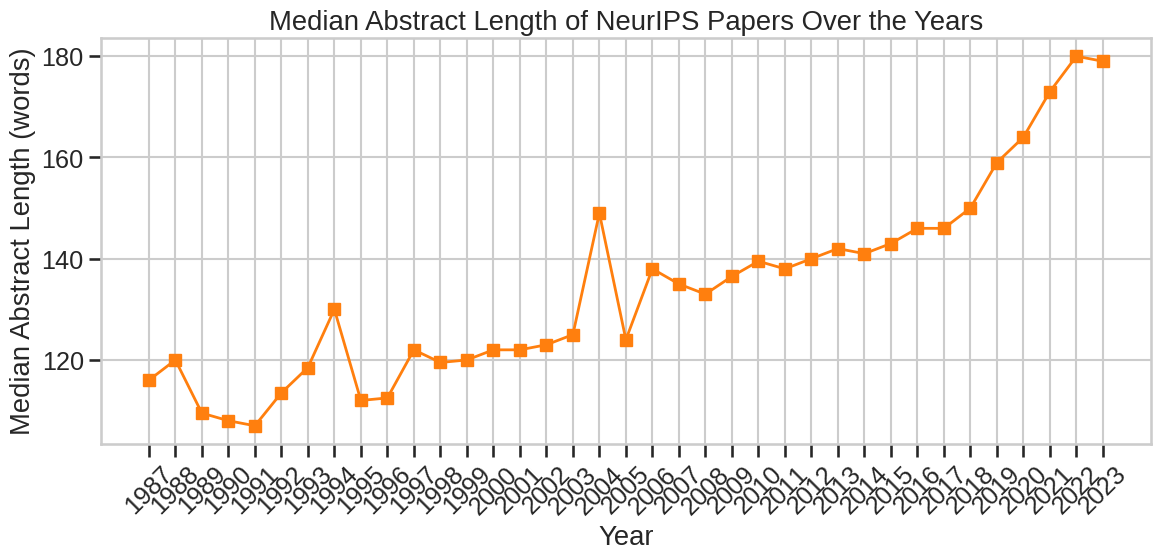


**Title Length Statistics per Year (in words):**

|   year |    mean |   median |   min |   max |
|-------:|--------:|---------:|------:|------:|
|   1987 | 7.92208 |        7 |     3 |    19 |
|   1988 | 8.20732 |        8 |     3 |    16 |
|   1989 | 8.54082 |        8 |     2 |    18 |
|   1990 | 8.46429 |        8 |     2 |    18 |
|   1991 | 8.42254 |        8 |     3 |    18 |
|   1992 | 8.73016 |        9 |     2 |    18 |
|   1993 | 8.27397 |        8 |     2 |    20 |
|   1994 | 8.21739 |        8 |     2 |    16 |
|   1995 | 7.67123 |        7 |     2 |    16 |
|   1996 | 8.01316 |        8 |     2 |    19 |
|   1997 | 7.62    |        7 |     2 |    18 |
|   1998 | 7.99333 |        8 |     2 |    19 |
|   1999 | 7.34667 |        7 |     2 |    18 |
|   2000 | 7.60265 |        7 |     1 |    16 |
|   2001 | 7.13846 |        7 |     2 |    15 |
|   2002 | 7.36765 |        7 |     1 |    18 |
|   2003 | 7.41538 |        7 |     2 |    15 |
|   2004 | 7.48792 |        7 |     2

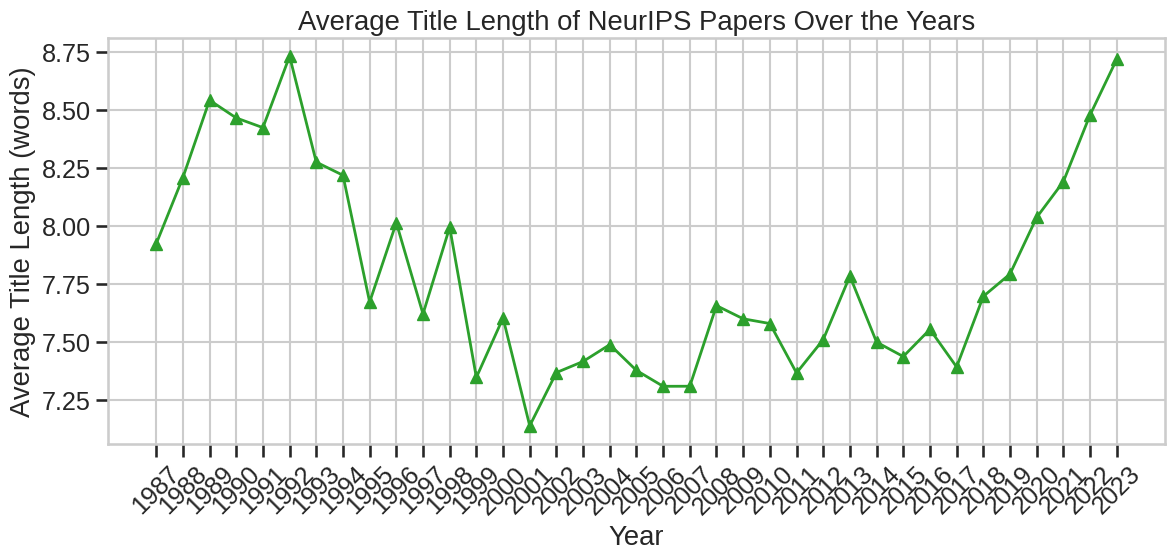


**Missing Abstracts Count per Year:**

|   year |   missing_abstract |
|-------:|-------------------:|
|   1987 |                  0 |
|   1988 |                  0 |
|   1989 |                  0 |
|   1990 |                  0 |
|   1991 |                  0 |
|   1992 |                  0 |
|   1993 |                  0 |
|   1994 |                  0 |
|   1995 |                  0 |
|   1996 |                  0 |
|   1997 |                  0 |
|   1998 |                  0 |
|   1999 |                  0 |
|   2000 |                  0 |
|   2001 |                  0 |
|   2002 |                  0 |
|   2003 |                  0 |
|   2004 |                  0 |
|   2005 |                  0 |
|   2006 |                  0 |
|   2007 |                  0 |
|   2008 |                  0 |
|   2009 |                  0 |
|   2010 |                  0 |
|   2011 |                  0 |
|   2012 |                  0 |
|   2013 |                  0 |
|   2014 |                  0 |


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a publication-quality style (using seaborn settings for a ggplot2-like feel)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk", font_scale=1.1)

# Load the NeurIPS papers dataset
df = pd.read_csv("neurips_papers_1987_2023_parallel_updated.csv")

# Ensure the 'year' column is numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Compute abstract and title lengths
df['abstract_length'] = df['abstract'].fillna("").str.split().apply(len)
df['title_length'] = df['title'].fillna("").str.split().apply(len)

# --- Explore Potentially Inappropriate Papers by Length ---
# (Papers with title length < 2 OR abstract length < 5)
short_texts = df[(df['abstract_length'] < 5)]

# --- Remove Papers with Abstract Length Less Than 5 ---
df_clean = df[df['abstract_length'] >= 5].copy()

# ================================
# Summary Statistics (Cleaned Data)
# ================================

# Total number of papers after filtering
total_papers = len(df_clean)
print(f"\n**Total Number of Papers:** {total_papers}\n")

# Count of papers per year
papers_per_year = df_clean['year'].value_counts().sort_index()
print("**Papers Per Year:**\n")
print(papers_per_year.to_markdown())

# Average abstract length per year (in words)
abstract_stats = df_clean.groupby('year')['abstract_length'].agg(['mean', 'median', 'min', 'max']).reset_index()
print("\n**Abstract Length Statistics per Year (in words, after filtering):**\n")
print(abstract_stats.to_markdown(index=False))

# ================================
# Publication-Quality Figures (Cleaned Data)
# ================================

# 1. Trend of Number of Papers Over the Years
plt.figure(figsize=(12, 6))
plt.plot(papers_per_year.index, papers_per_year.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Number of Accepted Papers to NeurIPS Papers Over the Years")
plt.xticks(papers_per_year.index, rotation=45)
plt.tight_layout()
plt.show()

# 2. Median Abstract Length Over the Years
avg_abs_length = df_clean.groupby('year')['abstract_length'].median()
plt.figure(figsize=(12, 6))
plt.plot(avg_abs_length.index, avg_abs_length.values, marker='s', linestyle='-', linewidth=2, color='tab:orange')
plt.xlabel("Year")
plt.ylabel("Median Abstract Length (words)")
plt.title("Median Abstract Length of NeurIPS Papers Over the Years")
plt.xticks(avg_abs_length.index, rotation=45)
plt.tight_layout()
plt.show()

# ================================
# Additional Preliminary Results (Cleaned Data)
# ================================

# --- Title Length Analysis ---
title_stats = df_clean.groupby('year')['title_length'].agg(['mean', 'median', 'min', 'max']).reset_index()
print("\n**Title Length Statistics per Year (in words):**\n")
print(title_stats.to_markdown(index=False))

avg_title_length = df_clean.groupby('year')['title_length'].mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_title_length.index, avg_title_length.values, marker='^', linestyle='-', linewidth=2, color='tab:green')
plt.xlabel("Year")
plt.ylabel("Average Title Length (words)")
plt.title("Average Title Length of NeurIPS Papers Over the Years")
plt.xticks(avg_title_length.index, rotation=45)
plt.tight_layout()
plt.show()

# --- Missing Abstract Analysis ---
df_clean['missing_abstract'] = df_clean['abstract'].isna() | (df_clean['abstract'].str.strip() == "")
missing_abstracts = df_clean.groupby('year')['missing_abstract'].sum().reset_index()
print("\n**Missing Abstracts Count per Year:**\n")
print(missing_abstracts.to_markdown(index=False))


## Embedding Analysis